In [1]:
import plotly.graph_objects as go
import networkx as nx
import tensorflow as tf


# Geoplotting imports
from urllib.request import urlopen
import json
import plotly.express as px

# Enable interactive plots in embedded iFrame
import plotly.io as pio
pio.renderers.default = 'iframe_connected'

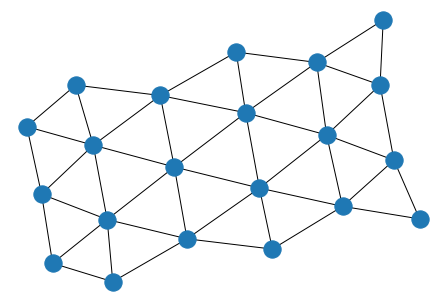

In [27]:
import networkx as nx
from matplotlib import pyplot as plt

G = nx.generators.lattice.triangular_lattice_graph(5,5)

#plt.figure(figsize=(6,6))
#pos = {(x,y):(y,-x) for x,y in G.nodes()}
#nx.draw(G, pos=pos, 
#        with_labels=True,
#        node_size=600)

nx.draw(G, pos={(x,y):(x, y) for x,y in G.nodes()})

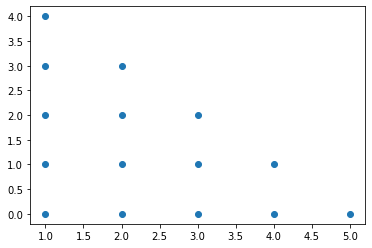

In [9]:
import matplotlib.pyplot as plt

def generate_2d_grid(n):
    pass

#G = nx.generators.lattice.star_graph(5)
G = nx.generators.small.diamond_graph()

G = nx.generators.lattice.triangular_lattice_graph(5, 5, with_positions=False)
#dir(G)
#flipped_pos = {node: (x,-y) for (node, (x,y)) in G.items()}
#flipped_pos
#for method in [draw, draw_networkx, draw_circular, draw_kamada_kawai, draw_planar, draw_random, draw_spectral, draw_spring]:
nx.draw_networkx(G, layout=nx.spring_layout(G))



ValueError: Received invalid argument(s): layout

In [18]:
import plotly.graph_objects as go
import networkx as nx
import tensorflow as tf
import numpy as np


# Geoplotting imports
from urllib.request import urlopen
import json
import plotly.express as px

# Enable interactive plots in embedded iFrame
import plotly.io as pio

pio.renderers.default = "iframe_connected"



class Renderer:
    AXIS_FORMATTING = {"showgrid": False, "zeroline": False, "showticklabels": False}

    def __init__(self, G, pos_attr='pos'):
        self.G = G

        # Graph attributes
        self.node_x = []
        self.node_y = []
        self.edge_x = []
        self.edge_y = []
        
    def step(self):
        self.node_x = []
        self.node_y = []
        for node in G.nodes():
            x, y = G.nodes[node]["pos"]
            self.node_x.append(x)
            self.node_y.append(y)

        self.edge_x = []
        self.edge_y = []
        for node_1, node_2 in G.edges():
            x0, y0 = G.nodes[node_1]["pos"]
            x1, y1 = G.nodes[node_2]["pos"]
            self.edge_x.extend([x0, x1, None])
            self.edge_y.extend([y0, y1, None])

    def render(self):
        self.node_trace = go.Scatter(
            x=self.node_x,
            y=self.node_y,
            mode="markers",
            hoverinfo="text",
            marker={"showscale": False, "colorscale": "YlGnBu", "size": 10, "line_width": 1},
        )
        self.node_trace.marker.color = np.random.randint(3, 23, len(self.G.nodes()))
        self.node_trace.text = node_text

        self.edge_trace = go.Scatter(x=self.edge_x, y=self.edge_y, line={'width': 0.5, 'color': "#888"}, hoverinfo="none", mode="lines")
        layout=go.Layout(
                showlegend=False,
                hovermode="closest",
                margin={'b': 0, 'l': 0, 'r': 0, 't': 0},
                xaxis=Renderer.AXIS_FORMATTING,
                yaxis=Renderer.AXIS_FORMATTING,
            )
        self.fig = go.Figure(
            data=[self.edge_trace, self.node_trace],
            layout=layout
        )

    def update_colors(self):
        self.node_trace.marker.color = np.random.randint(3, 23, len(self.G.nodes()))

    def update_layout(self):
        self.fig.update_traces()
    
    def show(self):
        self.fig.show()  


G = nx.random_geometric_graph(200, 0.125)
renderer = Renderer(G)
renderer.step()
renderer.render()
renderer.show()
input()
renderer.update_colors()
renderer.update_layout()
#renderer.show()



In [ ]:
from graphviz import Digraph


i = 0
class Node():
    def __init__(self, identifier, children=None):
        self.identifier = identifier
        self.children = children if children is not None else []

    def __str__(self):
        return self.identifier


def flatten_nodes(node, successor_attr='children'):
    # base case
    successors = getattr(node, successor_attr)
    if isinstance(successors, dict):
        successors = successors.values()
    if not successors:
        return [node]

    return [node] + [n for successor in successors for n in flatten_nodes(successor, successor_attr=successor_attr)]

def visualize_graph(root, directory='exported_graphs', file_prefix="graph", successor_attr='', label_func=lambda n:str(n), edge_label_func=None, root_to_none=True, count=0, show=False):
    # g = Digraph(graph_attr={"rankdir":'LR'})
    g = Digraph()

    # g = Digraph(format='png')
    nodes = flatten_nodes(root, successor_attr=successor_attr)
    node_to_id = {node : str(id_) for id_, node in enumerate(nodes)}

    # Add all nodes to graph
    for idx, node in enumerate(nodes):
        #if hasattr(node.state, "is_generated"):
        #    g.node(node_to_id[node], label=label_func(node), attrs="fillcolor=blue")
        #else:
        if root_to_none:
            g.node(node_to_id[node], label=label_func(node) if idx != 0 else 'None', ordering='in')
        else:
            g.node(node_to_id[node], label=label_func(node), ordering='in')


    # Add all edges to graph
    for node in nodes:
        successors = getattr(node, successor_attr)
        if isinstance(successors, dict):
            successors = successors.values()
        for successor in successors:
            if edge_label_func:
                g.edge(node_to_id[node], node_to_id[successor], label=edge_label_func(node, successor))
            else:
                g.edge(node_to_id[node], node_to_id[successor])

        if hasattr(node, 'link') and node.link is not None:
            g.edge(node_to_id[node], node_to_id[node.link], constraint='false', style='dotted')
        
    # Export graph
    global i
    g.render(filename=f"{directory}/{i:03}_{file_prefix}", format="png", cleanup=True)
    i += 1

    # Plot graph
    if show:
        g.view()

def main():
    n1 = Node('A')
    n2 = Node('B')
    n3 = Node('C')
    n4 = Node('D')
    n5 = Node('E')
    n6 = Node('F')
    n7 = Node('G')

    n1.children = [n2, n7]
    n2.children = [n3, n4]
    n4.children = [n5, n6]

    print(flatten_nodes(n1, successor_attr='children'))
    visualize_graph(n1,file_prefix='test', successor_attr='children')

if __name__ == '__main__':
    main()

In [1]:
# Import data
import time
import numpy as np

from skimage import io

vol = io.imread("https://s3.amazonaws.com/assets.datacamp.com/blog_assets/attention-mri.tif")
volume = vol.T
r, c = volume[0].shape

# Define frames
import plotly.graph_objects as go
nb_frames = 68

fig = go.Figure(frames=[go.Frame(data=go.Surface(
    z=(6.7 - k * 0.1) * np.ones((r, c)),
    surfacecolor=np.flipud(volume[67 - k]),
    cmin=0, cmax=200
    ),
    name=str(k) # you need to name the frame for the animation to behave properly
    )
    for k in range(nb_frames)])

# Add data to be displayed before animation starts
fig.add_trace(go.Surface(
    z=6.7 * np.ones((r, c)),
    surfacecolor=np.flipud(volume[67]),
    colorscale='Gray',
    cmin=0, cmax=200,
    colorbar=dict(thickness=20, ticklen=4)
    ))


def frame_args(duration):
    return {
            "frame": {"duration": duration},
            "mode": "immediate",
            "fromcurrent": True,
            "transition": {"duration": duration, "easing": "linear"},
        }

sliders = [
            {
                "pad": {"b": 10, "t": 60},
                "len": 0.9,
                "x": 0.1,
                "y": 0,
                "steps": [
                    {
                        "args": [[f.name], frame_args(0)],
                        "label": str(k),
                        "method": "animate",
                    }
                    for k, f in enumerate(fig.frames)
                ],
            }
        ]

# Layout
fig.update_layout(
         title='Slices in volumetric data',
         width=600,
         height=600,
         scene=dict(
                    zaxis=dict(range=[-0.1, 6.8], autorange=False),
                    aspectratio=dict(x=1, y=1, z=1),
                    ),
         updatemenus = [
            {
                "buttons": [
                    {
                        "args": [None, frame_args(50)],
                        "label": "&#9654;", # play symbol
                        "method": "animate",
                    },
                    {
                        "args": [[None], frame_args(0)],
                        "label": "&#9724;", # pause symbol
                        "method": "animate",
                    },
                ],
                "direction": "left",
                "pad": {"r": 10, "t": 70},
                "type": "buttons",
                "x": 0.1,
                "y": 0,
            }
         ],
         sliders=sliders
)

fig.show()

ModuleNotFoundError: No module named 'skimage'

In [9]:
import plotly.express as px




# Geoplotting imports
from urllib.request import urlopen
import json
import plotly.express as px

# Enable interactive plots in embedded iFrame
import plotly.io as pio

pio.renderers.default = "iframe_connected"

df = px.data.gapminder()
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

In [8]:
import pandas as pd
pd.DataFrame(columns=["Hello", "Bye"])

,Hello,Bye


In [ ]:

"""
board = PegSolitaire(board_type="triangle")
total_moves = 0

import time
t0 = time.perf_counter()
for _ in range(100_000):
    actions = board.get_legal_actions()
    #print(actions)
t1 = time.perf_counter()
"""
# print(actions)
# print("done")
# print(t1-t0, "s")
# print(bin(UP))
# print(np.bitwise_and(conv, UP_LEFT) == UP_LEFT)


# print(kernel)
# print(bin(conv[2, 2]))

# conv_list2 = conv.tolist()
        
"""
arr = np.array([direction.vector for direction in TRIANGE_DIRECTIONS])
board = np.tri(5, dtype=int)
print(arr)

print(board)


[[-1, -1],
 [-1,  0],
 [0, -1],
 [0,  1],
 [1,  0],
 [1,  1]]
 """